In [1]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
from tqdm import tqdm

# MF Symmtry breaking transition

In [381]:
def Bernoulli_MF(X, Delta, K, ):
    """
    X: X_n
    """

    # below_Delta = X < Delta
    # above_Delta = ~below_Delta
    X_1 = (2/(1+Delta) * (X+1)-1) * (X < Delta) + (2/(1-Delta) * (X-1)+1 )* (X >= Delta)

    S = np.sign(Delta-X)
    sigma = S.mean()
    Delta = K * sigma * (1-sigma**2)
    return X_1, Delta, sigma


In [36]:
L=100

K=0.1
# S_list = []
# X_list = []

def run_bernoulli_mf(K, L=100, seed=0):
    rng = np.random.default_rng(seed)
    X=np.random.uniform(-1,1,L)
    Delta=.99
    for idx in range(L):
        X,Delta, S = Bernoulli_MF(X, Delta, K=K)
        # S_list.append(S)
        # X_list.append(X.copy())
    return S

In [41]:
run_bernoulli_mf(K=2, L=100,)

np.float64(-0.64)

In [42]:
K_list = np.arange(0.1,2.5,0.1)
seed_list = np.arange(1000)
results = joblib.Parallel(n_jobs=-1, verbose=1)(joblib.delayed(run_bernoulli_mf)(K=K,seed=seed) for K in K_list for seed in seed_list)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 384 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 482 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1296 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 2596 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 4096 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 5796 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 7696 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 9796 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 12096 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 14596 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 17296 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 20196 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 24000 out of 24000 | elapsed:    9.1s finished


In [43]:
results = np.array(results).reshape(len(K_list), len(seed_list))


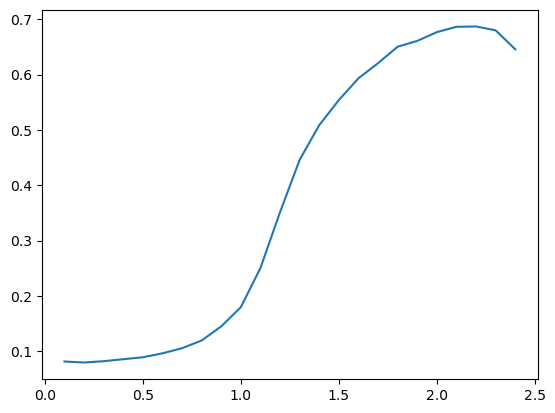

In [44]:
plt.plot(K_list,np.abs(results).mean(axis=1))

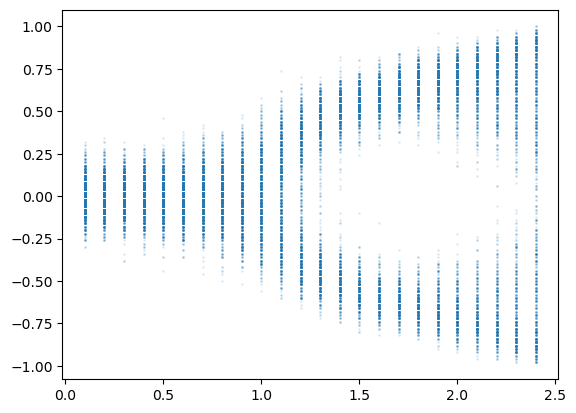

In [45]:
K_list_=[K for K in K_list for seed in seed_list]
plt.scatter(K_list_, results, s=1, alpha=0.1)

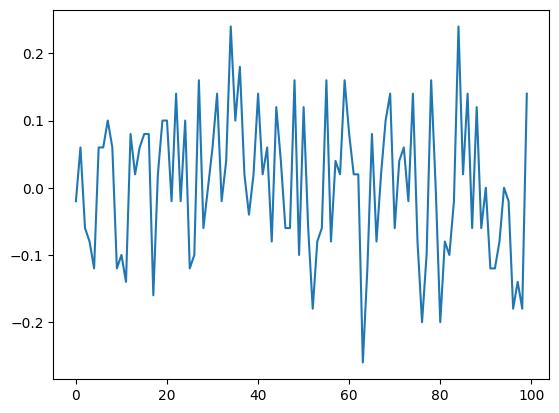

In [119]:
plt.plot(S_list, )

In [111]:
Delta

np.float64(-0.520128)

In [105]:
(X)

array([-0.25, -1.  , -0.25,  0.  , -0.25,  0.75, -0.5 , -0.25, -0.75,
        0.25, -1.  , -0.25, -0.25, -0.75, -0.25, -0.5 ,  0.75, -1.  ,
        0.25,  0.75,  0.25,  0.  , -0.5 , -0.25, -0.75, -0.25, -0.5 ,
        0.25,  0.75, -0.25, -1.  ,  0.  ,  0.5 , -0.25, -0.75, -0.5 ,
        0.  , -0.75, -0.25, -0.75, -0.25,  0.  ,  0.  ,  0.25,  0.  ,
        0.5 ,  0.5 , -0.75, -0.5 ,  0.25])

/tmp/ipykernel_1097079/3031622817.py:3: RuntimeWarning: invalid value encountered in power
  sigma_list = (1-1/np.sinh(K_list/2)**4)**(1/8)


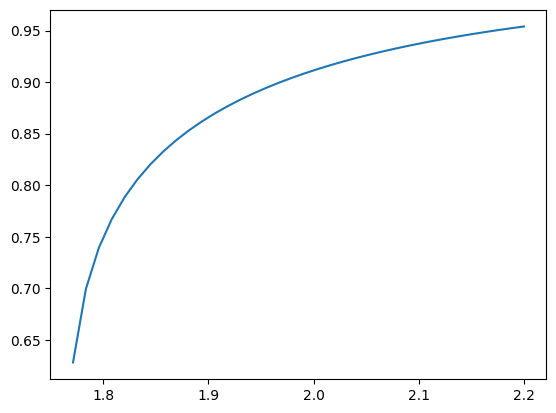

In [6]:
fig,ax=plt.subplots()
K_list = np.linspace(1.6,2.2)
sigma_list = (1-1/np.sinh(K_list/2)**4)**(1/8)
ax.plot(K_list,sigma_list)

In [10]:
z=np.arange(16).reshape((4,4))

In [16]:
np.roll(z,1,axis=0)

array([[12, 13, 14, 15],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [2]:
%load_ext line_profiler

# 2D Ising

In [2]:
def Bernoulli(X, Delta ):
    """
    X: X_n
    Delta: Delta_n
    """
    X_1 = (2/(1+Delta) * (X+1)-1) * (X < Delta) + (2/(1-Delta) * (X-1)+1 )* (X >= Delta)
    # print(X_1)
    return X_1

def get_S(X_1,X):
    S = np.sign(X_1-X)
    return S
    # sigma = S.mean()

def interaction(S,K):
    Delta = np.tanh(K/4 * (np.roll(S,-1,axis=0) + np.roll(S,1,axis=0) + np.roll(S,-1,axis=1) + np.roll(S,1,axis=1)) )

    return Delta

def control(X):
    """ This is very tricky-- because the float number around "0" has the finest precision, but the fixed point is around \pm 1, a trick is to "map" x->x+1 for x<0, and x->x-1 for x>0, and "x" as the storage variable.
    """
    mask_ = np.array([True,False]*(X.shape[0]//2))
    mask = mask_[:, None] ^ mask_
    X = X/2 + (2*mask-1)/2
    return X

<>:21: SyntaxWarning: invalid escape sequence '\p'
<>:21: SyntaxWarning: invalid escape sequence '\p'
/p/work/hpan/ipykernel_1485266/4180840128.py:21: SyntaxWarning: invalid escape sequence '\p'
  """ This is very tricky-- because the float number around "0" has the finest precision, but the fixed point is around \pm 1, a trick is to "map" x->x+1 for x<0, and x->x-1 for x>0, and "x" as the storage variable.


In [3]:
def control_(X_, L, mask_C=None):
    """ This is very tricky-- because the float number around "0" has the finest precision, but the fixed point is around pm 1, a trick is to "map" x->x+1 for x<0, and x->x-1 for x>0, and "x" as the storage variable.
    """
    mask_ = np.array([True,False]*(L//2))
    mask = mask_[:, None] ^ mask_
    if mask_C is not None:
        mask = mask[mask_C]

    return X_/2 * (np.sign(X_) *(2* mask-1) <0) + (np.sign(X_) *(2* mask-1) >0) * maps( maps(X_)/2 + (2*mask-1)/2)

    # X_ = X_/2 + (2*mask-1)/2 + np.sign(X_)/2
    # return X_

def Bernoulli_(X_, Delta ):
    """
    X: X_n
    Delta: Delta_n
    """
    X = maps(X_)
    # print(X)
    small_neg = (X<(Delta/2-1/2)) * (X<0) 
    small_pos = (X>(Delta/2+1/2)) * (X>0)
    # print("small_neg, small_pos\n", small_neg, small_pos)
    return  maps((2/(1+Delta) * (X+1)-1) * (X < Delta) + (2/(1-Delta) * (X-1)+1 )* (X > Delta)) * (1-small_neg-small_pos) + 2/(1+Delta) *X_ * small_neg + 2/(1-Delta) *X_ * small_pos
    # X_1_ = maps(X_1)

def get_S_(X_1,X):
    S = np.sign(X_1-X) * np.sign(X_1) * np.sign(X)
    return S

def maps(X):
    return (X+1) * (X <0) + (X-1) * (X >0)


In [4]:
def run(K, tf=None, L=50, seed=0, p=0, seed_C=0):
    if tf is None:
        tf = L
    rng = np.random.default_rng(seed)
    rng_C = np.random.default_rng(seed_C)
    X=rng.uniform(-1,1,(L,L))
    # X=np.ones((L,L))*0.1
    # Delta=rng.uniform(-1,1,(L,L))
    Delta = np.ones((L,L))*0.99
    S = np.zeros((L,L))
    # Delta=np.random.uniform(-.1,.1,(L,L))
    # S_list = []
    # sigma_list = []
    # print(X)
    for idx in range(tf):
        if rng_C.uniform()>p:
            X_1 = Bernoulli(X,Delta)
            # print(X_1)
            
            S = get_S(X_1,X)
            # print(S)
            Delta = interaction(S,K)
            # print("Delta\n",Delta)
            X = X_1
        else:
            # print(X)
            X_1 = control(X)
            # print(X_1)
            S = get_S(X_1,X)
            # print(S)
            X = X_1
        # sigma_list.append(S.mean())
    return S
    return (S * np.roll(S,1,axis=0) + S * np.roll(S,1,axis=1) ).mean()/2
    # return S.mean()
    # return sigma_list

In [5]:
def run_(K, tf=None, L=50, seed=0, p=0, seed_C=0):
    if tf is None:
        tf = L*10
    rng = np.random.default_rng(seed)
    rng_C = np.random.default_rng(seed_C)
    X=rng.uniform(-1,1,(L,L))
    # X=np.ones((L,L))*0.1
    # Delta=rng.uniform(-1,1,(L,L))
    Delta = np.ones((L,L))*0.99
    S = np.zeros((L,L))
    # Delta=np.random.uniform(-.1,.1,(L,L))
    # S_list = []
    # sigma_list = []
    X = maps(X)
    last_op=None
    # print(X)
    OP_list = []
    for idx in range(tf):
        if rng_C.uniform()>p:
            X_1 = Bernoulli_(X,Delta)
            
            # print(X_1)
            S = get_S_(X_1,X)
            # print(S)
            Delta = interaction(S,K)
            # print("Delta\n",Delta)
            X = X_1
        else:
            # print(X)
            X_1 = control_(X,L=L)
            # print(X_1)
            S = get_S_(X_1,X)
            # print(S)
            X = X_1
        OP_list.append( (S * np.roll(S,1,axis=0) + S * np.roll(S,1,axis=1) ).mean()/2)
        # sigma_list.append(S.mean())
    # print(np.abs(X).min(), last_op, Delta)
    # return S
    return OP_list
    # return S.mean()
    # return sigma_list

In [6]:
def run_individual(K, tf=None, L=50, seed=0, p=0, seed_C=0, OP=None):
    if tf is None:
        tf = L*10
    rng = np.random.default_rng(seed)
    rng_C = np.random.default_rng(seed_C)
    X=rng.uniform(-1,1,(L,L))
    Delta = np.ones((L,L))*0.99
    S = np.zeros((L,L))
    X = maps(X)
    OP_list = []
    for idx in range(tf):
        mask_C = (rng_C.uniform(0,1,(L,L)) < p)
        mask_B = ~mask_C
        if np.any(mask_B):
            X_1 = Bernoulli_(X[mask_B],Delta[mask_B])
            S[mask_B] = get_S_(X_1,X[mask_B])
            Delta = interaction(S,K)
            X[mask_B] = X_1

        if np.any(mask_C):
            X_1 = control_(X[mask_C], L, mask_C)
            S[mask_C] = get_S_(X_1,X[mask_C])
            X[mask_C] = X_1
        # OP_list.append( (S * np.roll(S,1,axis=0) + S * np.roll(S,1,axis=1) ).mean()/2)
    # return OP_list
    # return S
    # return (S * np.roll(S,1,axis=0) + S * np.roll(S,1,axis=1) ).mean()/2
    if OP=="Mz":
        return S.mean()
    elif OP=="Stagger":
        mask_ = np.array([True,False]*(L//2))
        mask = mask_[:, None] ^ mask_
        return ((2*mask-1) * S).mean()
    return S

In [7]:
def run_individual_2(K, tf=None, L=50, seed=0, p=0, seed_C=0, OP=None):
    if tf is None:
        # tf = L*10
        tf = L**2//2
    rng = np.random.default_rng(seed)
    rng_C = np.random.default_rng(seed_C)
    X=rng.uniform(-1,1,(L,L))
    Delta = np.ones((L,L))*0.99
    S = np.zeros((L,L))
    X = maps(X)
    OP_list = []
    for idx in range(tf):
        mask_C = (rng_C.uniform(0,1,(L,L)) < p)
        mask_B = ~mask_C
        if np.any(mask_B):
            X_1 = Bernoulli_(X[mask_B],Delta[mask_B])
            S[mask_B] = get_S_(X_1,X[mask_B])
            X[mask_B] = X_1

        if np.any(mask_C):
            X_1 = control_(X[mask_C], L, mask_C)
            S[mask_C] = get_S_(X_1,X[mask_C])
            X[mask_C] = X_1
        Delta = interaction(S,K)
        # OP_list.append( (S * np.roll(S,1,axis=0) + S * np.roll(S,1,axis=1) ).mean()/2)
    # return OP_list
    # return S
    # return (S * np.roll(S,1,axis=0) + S * np.roll(S,1,axis=1) ).mean()/2
    if OP=="Mz":
        return S.mean()
    elif OP=="Stagger":
        mask_ = np.array([True,False]*(L//2))
        mask = mask_[:, None] ^ mask_
        return ((2*mask-1) * S).mean()
    return S

In [25]:
S_list_bare = run_individual(K=1,seed=0, L=40, p=0.99, seed_C=0, tf=800)

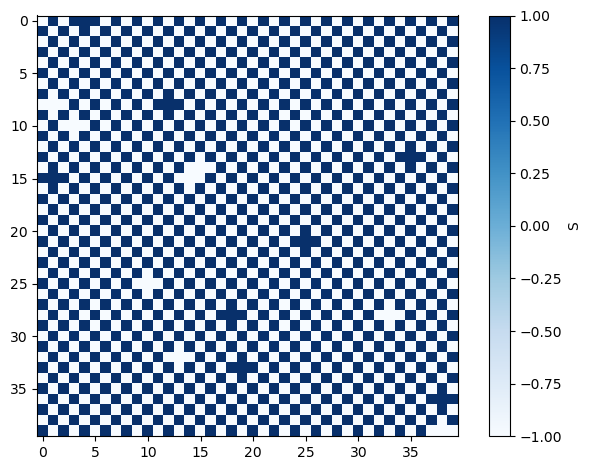

In [27]:
fig,ax=plt.subplots(tight_layout=True)
im = ax.imshow(S_list_bare,vmin=-1,vmax=1, cmap='Blues')
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("S")
fig.savefig("p0.99_K1.pdf")

In [265]:
run_individual_2(K=2,seed=0, L=50, p=0.6, seed_C=0, tf=250)

np.float64(0.2008)

In [266]:
run_individual(K=2,seed=0, L=50, p=0.6, seed_C=0, tf=250)

np.float64(0.2856)

In [152]:
S_list_bare

np.float64(0.205)

In [891]:
S_list_bare = run(K=1,seed=0, L=40, p=0., seed_C=0, tf=40)

In [ ]:
S_list_bare_ = run_(K=1,seed=0, L=40, p=0.95, seed_C=0)

In [861]:
Bernoulli(np.array([[0.90099838-1]]), np.array([[ 0.]]))

array([[0.80199676]])

In [865]:
Bernoulli_(np.array([[0.90099838]]), np.array([[ 0.]]))

small_neg, small_pos
 [[False]] [[False]]


array([[-0.19800324]])

In [ ]:
S_list_bare_

In [893]:
S_list_bare_ - S_list_bare

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(40, 40))

In [980]:
S_list_bare_ = run_(K=1,seed=0, L=200, p=0.95, seed_C=0, )

In [982]:
S_list_bare_

array([[-1.,  1., -1., ...,  1., -1.,  1.],
       [ 1., -1.,  1., ..., -1.,  1., -1.],
       [-1.,  1., -1., ...,  1., -1.,  1.],
       ...,
       [ 1., -1.,  1., ..., -1.,  1., -1.],
       [-1.,  1., -1., ...,  1., -1.,  1.],
       [ 1., -1.,  1., ..., -1.,  1., -1.]], shape=(200, 200))

In [960]:
np.abs(S_list_bare_ - S_list_bare).sum()

ValueError: operands could not be broadcast together with shapes (200,200) (40,40) 

In [ ]:
plt.imshow(S_list_bare,vmin=-1,vmax=1)
plt.colorbar()

In [444]:
S_list_bare

array([[-1.,  1., -1.,  1.],
       [ 1., -1.,  1., -1.],
       [-1.,  1., -1.,  1.],
       [ 1., -1.,  1., -1.]])

In [445]:
S_list_bare_

array([[ 1., -1., -1., -1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1., -1.],
       [ 1., -1.,  1., -1.]])

In [53]:
S_list_bare.mean()

np.float64(0.0)

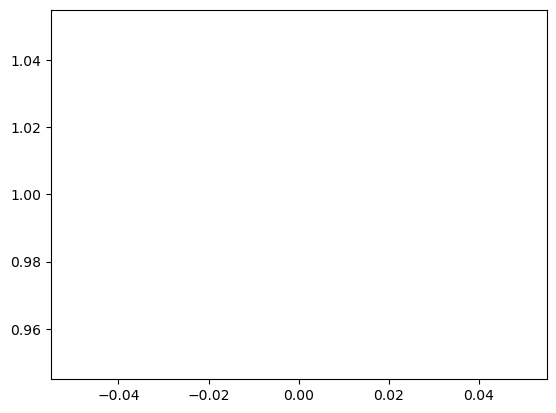

In [161]:
plt.plot(S_list_bare)

In [33]:
import joblib

In [343]:
K_list = np.arange(1.4,2.,0.02)
seed_list = np.arange(100)
p=0
L_list = np.array([40,80,120,160])
iteration = [(L, K, seed) for L in L_list for K in K_list for seed in seed_list]
results = joblib.Parallel(n_jobs=-1, verbose=1)(joblib.delayed(run_individual)(K=K,seed=seed, seed_C=seed, L=L, p=p, OP="Mz") for L,K, seed in tqdm(iteration))
print(len(iteration))


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 384 concurrent workers.


[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    2.2s

[Parallel(n_jobs=-1)]: Done 482 tasks      | elapsed:    3.3s

[Parallel(n_jobs=-1)]: Done 1032 tasks      | elapsed:    4.2s


[Parallel(n_jobs=-1)]: Done 1682 tasks      | elapsed:    5.4s


[Parallel(n_jobs=-1)]: Done 2432 tasks      | elapsed:    6.6s


[Parallel(n_jobs=-1)]: Done 3282 tasks      | elapsed:    8.7s



[Parallel(n_jobs=-1)]: Done 4232 tasks      | elapsed:   13.4s


[Parallel(n_jobs=-1)]: Done 5282 tasks      | elapsed:   18.6s



[Parallel(n_jobs=-1)]: Done 6432 tasks      | elapsed:   31.2s




[Parallel(n_jobs=-1)]: Done 7682 tasks      | elapsed:   58.1s



[Parallel(n_jobs=-1)]: Done 9032 tasks      | elapsed:  1.5min






[Parallel(n_jobs=-1)]: Done 10482 tasks      | elapsed:  3.8min





100%|██████████| 12400/12400 [05:17<00:00, 39.04it/s]


12400


[Parallel(n_jobs=-1)]: Done 12400 out of 12400 | elapsed:  6.4min finished


In [344]:
results=np.array(results).reshape(L_list.shape[0], K_list.shape[0],seed_list.shape[0], )

Text(0, 0.5, 'Magnetization')

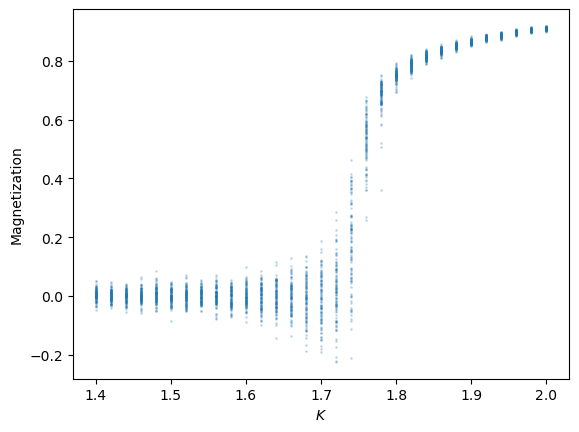

In [345]:
K_list_=[K for K in K_list for seed in seed_list]
plt.scatter(K_list_, results[-1], s=1, alpha=0.2)
plt.xlabel('$K$')
plt.ylabel(r'Magnetization')

In [346]:
binder = 1 - (results**4).mean(axis=-1) / (3*(results**2).mean(axis=-1)**2)

Text(0, 0.5, '$1- \\frac{\\langle M_z^4 \\rangle}{3\\langle M_z^2 \\rangle^2}$')

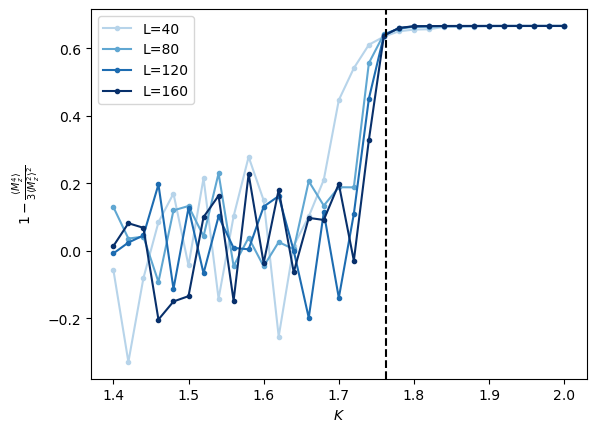

In [347]:
cmap = plt.cm.Blues(np.linspace(0.3,1,L_list.shape[0]))
for L_idx,L  in enumerate(L_list):
    plt.plot(K_list,binder[L_idx],'.-',label=f'L={L}', color=cmap[L_idx])
plt.legend()
plt.axvline(x=2*np.log(1+np.sqrt(2)), color='k', ls='--', label='theory')
plt.xlabel('$K$')
plt.ylabel(r'$1- \frac{\langle M_z^4 \rangle}{3\langle M_z^2 \rangle^2}$')

In [313]:
mean = results.mean(axis=-1)


In [303]:
2*np.log(1+np.sqrt(2))

np.float64(1.7627471740390859)

Text(0, 0.5, '$\\langle M_z \\rangle$')

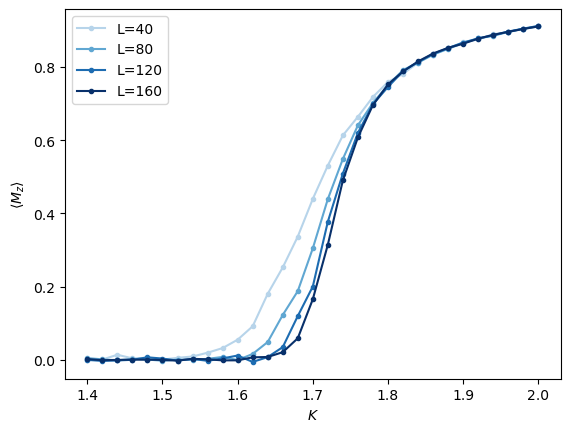

In [348]:
cmap = plt.cm.Blues(np.linspace(0.3,1,L_list.shape[0]))
for L_idx,L  in enumerate(L_list):
    plt.plot(K_list,mean[L_idx],'.-',label=f'L={L}', color=cmap[L_idx])
plt.legend()
plt.xlabel('$K$')
plt.ylabel(r'$\langle M_z \rangle$')

In [ ]:
plt.plot(K_list, results.mean(axis=1),'.-')

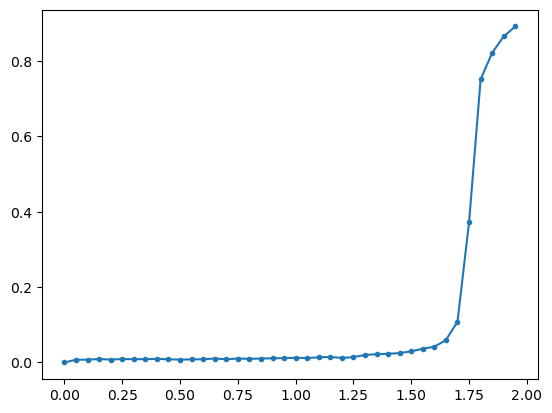

In [210]:
plt.plot(K_list,np.abs(np.array(results).reshape(K_list.shape[0],seed_list.shape[0])).mean(axis=1),'.-')
# plt.ylim(0,1)
# plt.xlim(1.2,2.2)

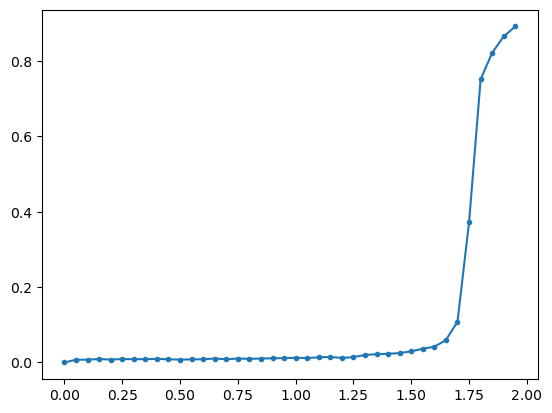

In [ ]:
plt.plot(K_list,np.abs(np.array(results).reshape(K_list.shape[0],seed_list.shape[0])).mean(axis=1),'.-')
# plt.ylim(0,1)
# plt.xlim(1.2,2.2)

In [505]:
# K_list = np.arange(0.,2,0.05)
K = 0
seed_list = np.arange(500)
p_list = np.linspace(0,0.95,21)
# p_list = np.array([0.95])
L_list = np.array([10,20,40,80])
# L_list = np.array([40])
iteration = [(L, p, seed) for L in L_list for p in p_list for seed in seed_list]
results1 = joblib.Parallel(n_jobs=-1, verbose=1,)(joblib.delayed(run_individual)(K=K,seed=seed, seed_C=seed, L=L, p=p, OP='Stagger') for L, p, seed in iteration)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 384 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 482 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1296 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 2596 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 4096 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 5796 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 7696 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 9796 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 12096 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 14596 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 17296 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 20196 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 23296 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 26596 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 30096 ta

In [506]:
results1 = np.array(results1).reshape(len(L_list), len(p_list), len(seed_list))

Text(0, 0.5, 'Staggered Magnetization')

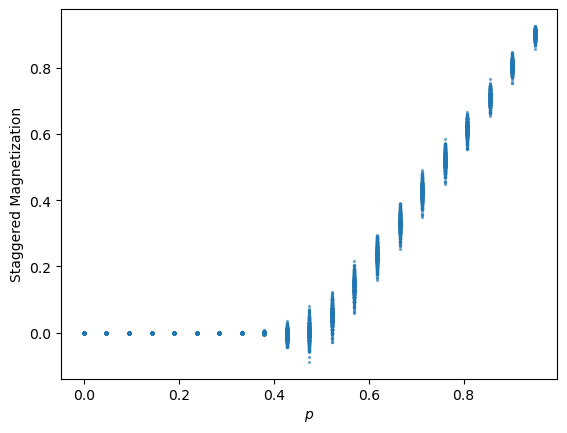

In [507]:
p_list_=[K for K in p_list for seed in seed_list]
plt.scatter(p_list_, results1[-2], s=2, alpha=0.5)
plt.xlabel('$p$')
plt.ylabel(r'Staggered Magnetization')

In [508]:
# results1_center = results1 - results1.mean(axis=-1, keepdims=True)

In [509]:
binder1 = 1 - (results1**4).mean(axis=-1) / (3*(results1**2).mean(axis=-1)**2)

/p/work/hpan/ipykernel_3084475/3320913305.py:1: RuntimeWarning: invalid value encountered in divide
  binder1 = 1 - (results1**4).mean(axis=-1) / (3*(results1**2).mean(axis=-1)**2)


Text(0, 0.5, '$1- \\frac{\\langle M_z^4 \\rangle}{3\\langle M_z^2 \\rangle^2}$')

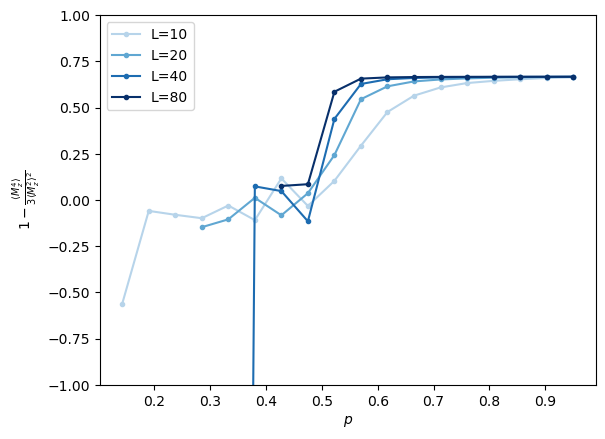

In [514]:
cmap = plt.cm.Blues(np.linspace(0.3,1,L_list.shape[0]))

for L_idx,L  in enumerate(L_list[:]):
    plt.plot(p_list,binder1[L_idx],'.-',label=f'L={L}', color=cmap[L_idx])
plt.legend()
plt.ylim(-1,1)
# plt.axvline(x=2*np.log(1+np.sqrt(2)), color='k', ls='--', label='theory')
plt.xlabel('$p$')
plt.ylabel(r'$1- \frac{\langle M_z^4 \rangle}{3\langle M_z^2 \rangle^2}$')

In [511]:
mean1 = results1.mean(axis=-1)

Text(0, 0.5, '$\\langle M_z \\rangle$')

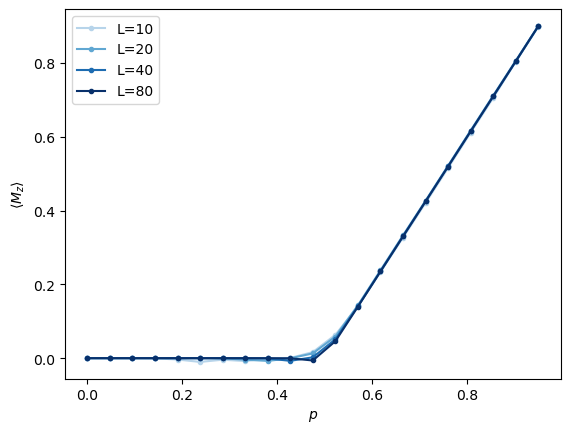

In [512]:
cmap = plt.cm.Blues(np.linspace(0.3,1,L_list.shape[0]))

for L_idx,L  in enumerate(L_list):
    plt.plot(p_list,mean1[L_idx],'.-',label=f'L={L}', color=cmap[L_idx])
plt.legend()
plt.xlabel('$p$')
plt.ylabel(r'$\langle M_z \rangle$')

In [382]:
1.seems that control is too strong
2. the current setup is to treat 
"Bernoulli +  interaction " (1-p) vs "control" (p)
another way is to treat "Bernoulli" (1-p) vs "control" (p) + "interaction" 

SyntaxError: invalid decimal literal (1039927945.py, line 1)

In [ ]:
K_list = np.arange(1.2,2.2,0.05)
seed_list = np.arange(20)
results_bare = joblib.Parallel(n_jobs=-1, verbose=1)(joblib.delayed(run_individual)(K=K,seed=seed, func=Bernoulli_bare,L=100) for K in K_list for seed in seed_list)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 384 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 out of 420 | elapsed:    3.0s remaining:   14.2s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:    4.4s finished


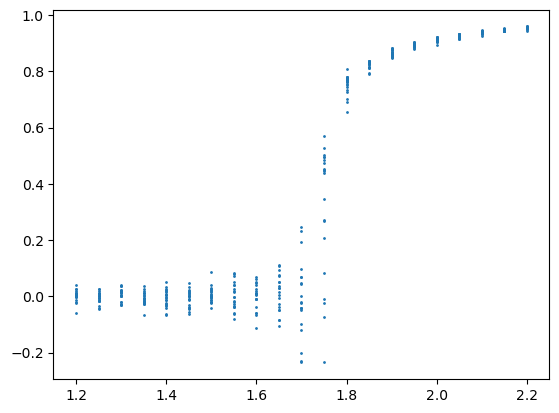

In [28]:
K_list_=[K for K in K_list for seed in seed_list]
plt.scatter(K_list_, results_bare, s=1, alpha=1)
# plt.savefig('j.png', dpi=300)

(1.2, 2.2)

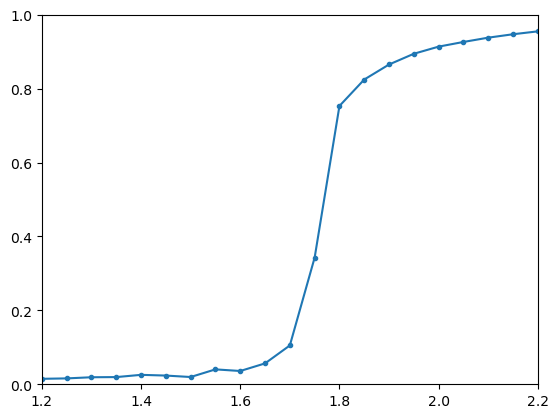

In [29]:
plt.plot(K_list,np.abs(np.array(results_bare).reshape(K_list.shape[0],seed_list.shape[0])).mean(axis=1),'.-')
plt.ylim(0,1)
plt.xlim(1.2,2.2)
# plt.savefig('k.png', dpi=300)

In [62]:
results = np.array(results).reshape(len(K_list), len(seed_list))


In [63]:
np.array(results).shape

(10, 10)

In [65]:
results

array([[ 4.000e-03,  3.200e-03,  1.400e-02, -2.060e-02,  9.800e-03,
        -3.200e-03, -3.800e-03, -5.000e-03,  3.000e-03,  1.820e-02],
       [ 1.740e-02, -5.400e-03,  1.020e-02,  2.900e-02, -3.200e-03,
        -1.800e-02,  3.680e-02,  1.220e-02,  1.960e-02, -2.940e-02],
       [ 4.800e-03,  5.600e-03, -3.800e-03, -2.400e-03, -1.660e-02,
        -1.080e-02,  8.200e-03, -4.200e-03,  2.700e-02,  1.480e-02],
       [ 5.400e-03, -3.060e-02,  2.400e-03,  2.340e-02, -1.180e-02,
         1.680e-02,  1.100e-02, -1.540e-02,  2.300e-02,  1.160e-02],
       [ 1.640e-02, -3.040e-02,  1.780e-02, -2.960e-02, -1.760e-02,
         1.060e-02, -2.440e-02,  3.440e-02, -9.400e-03, -1.740e-02],
       [ 3.560e-02, -9.800e-03, -4.340e-02,  7.720e-02, -2.440e-02,
         2.580e-02, -2.740e-02,  2.380e-02, -3.820e-02,  1.940e-02],
       [-2.360e-02, -1.008e-01, -7.360e-02,  2.260e-02, -3.680e-02,
        -2.420e-02,  3.760e-02, -1.040e-02, -1.620e-02, -4.540e-02],
       [ 1.764e-01,  3.960e-02, -3.140e-0

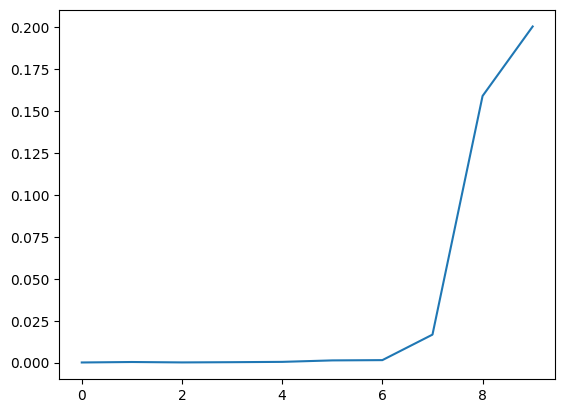

In [67]:
plt.plot(results.var(axis=1))

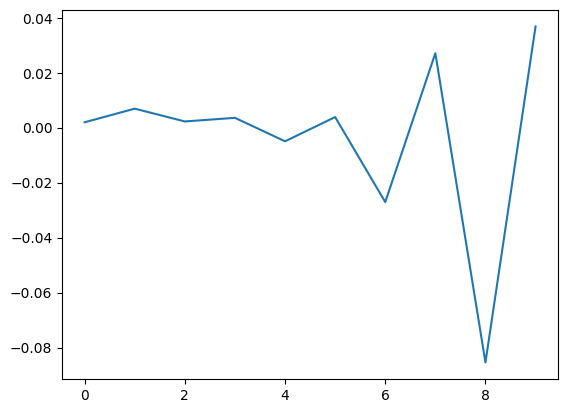

In [66]:
plt.plot(results.mean(axis=1))

In [ ]:
run(K=k_list, )

## Profiling

In [ ]:
%lprun -f Bernoulli Bernoulli(X,Delta,K)
%lprun -f Bernoulli S_list = run(K=2)

In [173]:
S_list[-1].mean()

np.float64(0.5982)

In [9]:
(1-1/np.sinh(2*np.log(1+np.sqrt(2))/2)**4)**(1/8)

np.float64(0.0)

In [60]:
def rules(s,K):
    return K*s*(1-s**2)
def trajectory(s,K,n):
    x = np.zeros(n)
    x[0] = s
    for i in range(1,n):
        x[i] = rules(x[i-1],K)
    return x

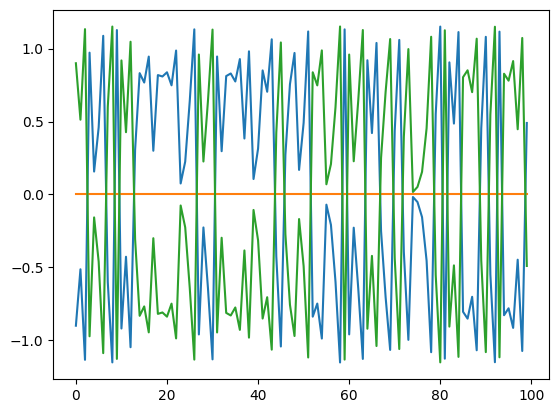

In [61]:
for s in np.linspace(-0.9,0.9,3):
    plt.plot(trajectory(s,3,100))

In [62]:
def Bernoulli(x,Delta):

    return (2/(1+Delta)*(x+1)-1) * (x < Delta) + (2/(1-Delta)*(x-1)+1) * (x > Delta)
    # if -1 < x < Delta:
    #     return 2/(1+Delta)*(x+1)-1
    # else:
    #     return 2/(1-Delta)*(x-1)+1

In [65]:
(Bernoulli(x,0.)>0).sum()

np.int64(506)

In [64]:
x=np.random.rand(1000)*2-1

In [8]:
Delta = np.random.rand(1000)*2-1

In [66]:
K=1.4
sigma_list=[]
for i in range(1000):
    x=Bernoulli(x,Delta)
    S=(x<Delta)*(1)+(x>=Delta)*(-1)
    sigma= S.mean()
    Delta=K*sigma*(1-sigma**2)
    sigma_list.append(sigma)
    # x=x


ValueError: operands could not be broadcast together with shapes (100,100) (1000,) 

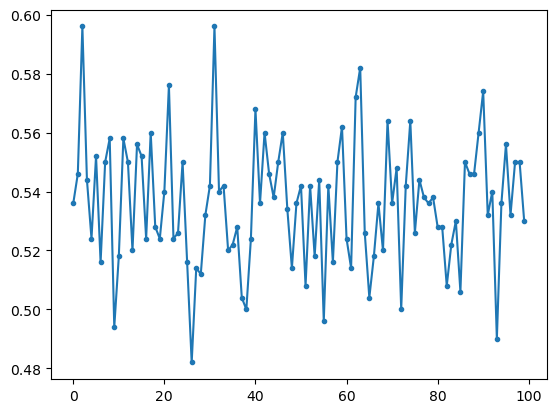

In [18]:
plt.plot(sigma_list[-100:],'.-')

In [95]:
np.sqrt(1-1/K)

0.816496580927726

In [311]:
maps = lambda x: x/2+1/2

In [312]:
x_list =[0.5]
for _ in range(10):
    x_list.append(maps(x_list[-1]))

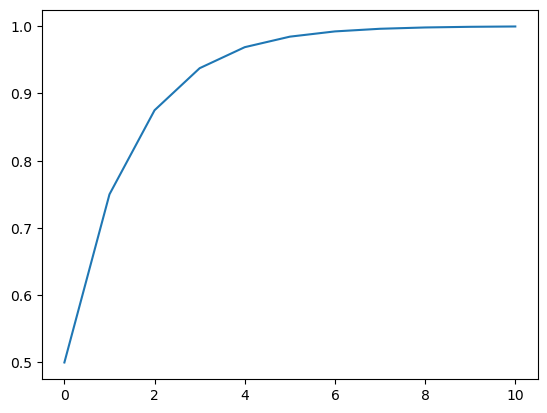

In [313]:
plt.plot(x_list)

In [ ]:
kk

In [ ]:
# def Bernoulli(X, Delta , K, S, even =True):
#     """
#     X: X_n
#     Delta: Delta_n
#     """
#     mask_ = np.array([True,False]*(X.shape[0]//2))
#     if even:
#         mask = mask_[:, None] ^ mask_
#     else:
#         mask = ~ (mask_[:, None] ^ mask_)
#     X_1 = X.copy()
#     X_1[mask] = (2/(1+Delta[mask]) * (X[mask]+1)-1) * (X[mask] < Delta[mask]) + (2/(1-Delta[mask]) * (X[mask]-1)+1 )* (X[mask] >= Delta[mask])
#     S[mask] = np.sign(Delta[mask]-X[mask])
#     # sigma = S.mean()

#     Delta[mask] = np.tanh(K/4 * (np.roll(S,-1,axis=0)[mask] + np.roll(S,1,axis=0)[mask] + np.roll(S,-1,axis=1)[mask] + np.roll(S,1,axis=1)[mask]) )

#     return X_1, Delta, S
